In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 提取数据进行训练和测试
# 训练数据
train_images_part = train_images[:50000].reshape((50000, 28, 28, 1))
train_images_part = train_images_part.astype('float32') / 255
train_labels_part = train_labels[:50000]
print(train_images_part.shape)
# 验证数据
val_x = train_images[-10000:].reshape((10000, 28, 28, 1))
val_x = val_x.astype('float32') / 255
val_y = train_labels[-10000:]
print(val_x.shape)
# 测试数据
test_images_part = test_images[:10000].reshape((10000, 28 , 28, 1))
test_images_part = test_images_part.astype('float32') / 255
test_labels_part = test_labels[:10000]
print(test_labels_part.shape) 


Using TensorFlow backend.


(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [2]:
# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_labels_part = to_categorical(train_labels_part)
val_y = to_categorical(val_y)
print(val_y.shape)
test_labels_part = to_categorical(test_labels_part)
test_labels.shape

(10000, 10)


(10000,)

In [3]:
import keras
keras.__version__

'2.3.1'

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same',activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3,3), padding = 'same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate = 0.001),
             metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                401440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
________________________________________________

In [5]:
batch_size = 128
epochs = 10
history = model.fit(train_images_part, 
                    train_labels_part, 
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y))

test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 317us/step - loss: 0.4509 - accuracy: 0.8584 - val_loss: 0.0843 - val_accuracy: 0.9763
Epoch 2/10
50000/50000 [==============================] - 12s 238us/step - loss: 0.1863 - accuracy: 0.9404 - val_loss: 0.0620 - val_accuracy: 0.9829
Epoch 3/10
50000/50000 [==============================] - 12s 249us/step - loss: 0.1462 - accuracy: 0.9536 - val_loss: 0.0558 - val_accuracy: 0.9860
Epoch 4/10
50000/50000 [==============================] - 12s 242us/step - loss: 0.1216 - accuracy: 0.9610 - val_loss: 0.0479 - val_accuracy: 0.9873
Epoch 5/10
50000/50000 [==============================] - 12s 239us/step - loss: 0.1064 - accuracy: 0.9648 - val_loss: 0.0491 - val_accuracy: 0.9869
Epoch 6/10
50000/50000 [==============================] - 12s 241us/step - loss: 0.0986 - accuracy: 0.9669 - val_loss: 0.0500 - val_accuracy: 0.9861
Epoch 7/

In [6]:
# 保存模型
# model.save('mnist_CNN.h5')

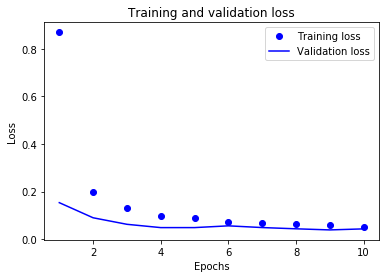

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### model2

In [5]:
from keras.layers import BatchNormalization,GlobalAveragePooling2D
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding = 'same', activation='relu', input_shape=[28, 28, 1]))
# model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3),padding = 'same', activation='relu'))
# model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3),padding = 'same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
# model2.add(Conv2D(128, (3,3), activation='relu'))

# model2.add(GlobalAveragePooling2D())
# model2.add(Flatten())
# model2.add(Dense(64, activation='relu'))
# model2.add(Dropout(0.4))
# model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate = 0.005),
             metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
Total params: 129,600
Trainable params: 129,600
Non-trainable params: 0
________________________________________________

In [18]:
batch_size = 128
epochs = 10
history = model2.fit(train_images_part, 
                    train_labels_part, 
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y))

test_loss, test_acc = model2.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 444us/step - loss: 0.6388 - accuracy: 0.7723 - val_loss: 0.0722 - val_accuracy: 0.9766
Epoch 2/10
50000/50000 [==============================] - 22s 435us/step - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.0605 - val_accuracy: 0.9833
Epoch 3/10
50000/50000 [==============================] - 19s 375us/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 4/10
50000/50000 [==============================] - 18s 358us/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 5/10
50000/50000 [==============================] - 18s 360us/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 6/10
50000/50000 [==============================] - 20s 405us/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0379 - val_accuracy: 0.9891
Epoch 7/10
50000/50000 [==============================] 

KeyboardInterrupt: 

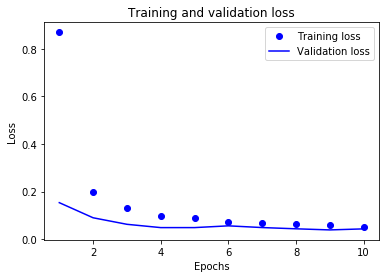

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 卷积可视化测试

In [67]:
from keras.layers import Input
from keras.models import Model
mnist_input = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),activation='relu')(mnist_input)
x = Conv2D(32,(3,3), activation='relu')(x)
pool1 = MaxPooling2D((2,2),name='pool1')(x)

x = Conv2D(64,(3,3),activation='relu')(pool1)
x = Conv2D(64,(3,3),activation='relu')(x)
pool2 = MaxPooling2D((2,2),name = 'pool2')(x)

x = Flatten()(pool2)
x = Dense(32, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(10, activation='softmax')(x)

model_full = Model(inputs=mnist_input,outputs = output)
model_full.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
model_full.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0  

In [73]:
model_full.get_layer(index=3).name

'pool1'

In [41]:
batch_size = 128
epochs = 10
history = model_full.fit(train_images_part, 
                    train_labels_part, 
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 205us/step - loss: 0.5048 - accuracy: 0.8346 - val_loss: 0.0731 - val_accuracy: 0.9780
Epoch 2/10
50000/50000 [==============================] - 10s 192us/step - loss: 0.1723 - accuracy: 0.9455 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 3/10
50000/50000 [==============================] - 10s 193us/step - loss: 0.1252 - accuracy: 0.9601 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 4/10
50000/50000 [==============================] - 10s 192us/step - loss: 0.0915 - accuracy: 0.9712 - val_loss: 0.0458 - val_accuracy: 0.9887
Epoch 5/10
50000/50000 [==============================] - 10s 195us/step - loss: 0.0803 - accuracy: 0.9744 - val_loss: 0.0362 - val_accuracy: 0.9920
Epoch 6/10
50000/50000 [==============================] - 10s 193us/step - loss: 0.0684 - accuracy: 0.9782 - val_loss: 0.0374 - val_accuracy: 0.9906
Epoch 7/10
50000/50000 [==============================] 

In [94]:
test_loss, test_acc = model_full.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

10000/10000 [==============================] - 2s 164us/step
test_loss:2.3119103340148928, test_acc:0.0860000029206276


In [92]:
import numpy as np

img = train_images_part[2]
# print(x.shape)
x = np.expand_dims(img, axis=0)
# x = preprocess_input(x)

y_pred = model_full.predict(x)
value = np.argmax(y_pred)
y_pred, value

(array([[0.10505511, 0.0947281 , 0.10313794, 0.10262601, 0.09904749,
         0.10993163, 0.09509514, 0.09285627, 0.10077466, 0.09674766]],
       dtype=float32), 5)

Text(0.5, 1.0, 'The img of newData')

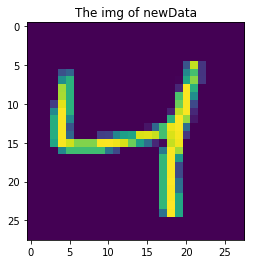

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
newData = np.reshape(img,(28,28))
plt.imshow(newData)
plt.title("The img of newData")

### pool1

In [54]:
model_conv = Model(inputs=mnist_input, outputs = pool1)
# model_conv.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
model_conv.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


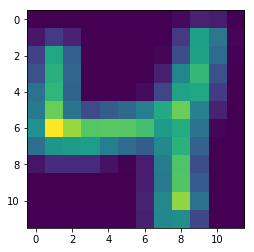

In [59]:
y_conv = model_conv.predict(x)
y_conv = np.sum(y_conv,axis=-1)
y_conv = np.reshape(y_conv,(12,12))
y_conv.shape
plt.imshow(y_conv)

### pool1下面的卷积层

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        18496     
Total params: 28,064
Trainable params: 28,064
Non-trainable params: 0
_________________________________________________________________


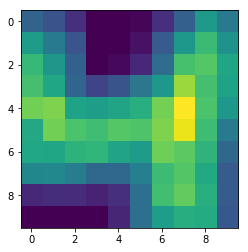

In [87]:
model3 = Model(inputs = mnist_input, outputs = model_full.get_layer(index=4).output)
model3.summary()
p3 = model3.predict(x)
p3 = np.sum(p3,axis=-1)
p3.shape
p3 = np.reshape(p3,(10, 10))
plt.imshow(p3)

### pool1下面第二个卷积层

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 64)          36928     
Total params: 64,992
Trainable params: 64,992
Non-trainable params: 0
______________________________________________________

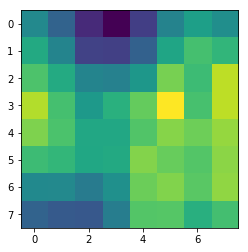

In [91]:
model4 = Model(inputs = mnist_input, outputs = model_full.get_layer(index=5).output)
model4.summary()
p4= model4.predict(x)
p4 = np.sum(p4,axis=-1)

p4 = np.reshape(p4,(p4.shape[-2], p4.shape[-1]))
plt.imshow(p4)

### pool2

In [81]:
model_conv2 = Model(inputs= mnist_input, outputs = pool2)
model_conv2.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0  

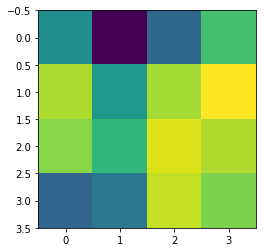

In [82]:
y_conv2 = model_conv2.predict(x)
y_conv2 = np.sum(y_conv2,axis=-1)
y_conv2 = np.reshape(y_conv2,(4,4))
y_conv2.shape

plt.imshow(y_conv2)